## Libs

In [19]:
import pandas as pd
import seaborn as srn
import statistics as sts

## DATABASE

In [20]:
data = pd.read_csv('tempo.csv', sep=';')
data.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [21]:
data.shape

(14, 5)

## Null Values

In [22]:
data.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

## Tratamentos

### Aparencia

In [23]:
aparencia_data = data.groupby(data['Aparencia']).size()
aparencia_data

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [24]:
data.loc[data['Aparencia'] == 'menos', 'Aparencia'] = 'chuva'
aparencia_data = data.groupby(data['Aparencia']).size()
aparencia_data

Aparencia
chuva      6
nublado    3
sol        5
dtype: int64

<Axes: xlabel='Aparencia'>

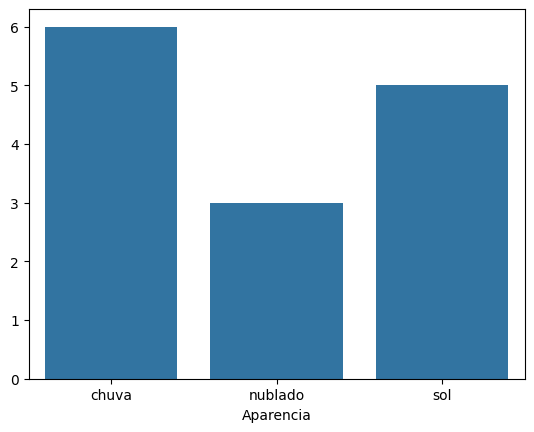

In [25]:
srn.barplot(aparencia_data)

### Temperatura

In [26]:
data['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [27]:
data.loc[(data['Temperatura'] < -130) | (data['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [28]:
from numpy import dtype, int64


mediana_temperatura = sts.median(data['Temperatura'])
mediana_temperatura

73.5

In [29]:
data.loc[data['Temperatura'] > 130, 'Temperatura'] = mediana_temperatura
data['Temperatura'].describe()

C:\Users\glauc\AppData\Local\Temp\ipykernel_5572\2786161469.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '73.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['Temperatura'] > 130, 'Temperatura'] = mediana_temperatura


count    14.000000
mean     73.678571
std       6.556286
min      64.000000
25%      69.250000
50%      72.750000
75%      78.750000
max      85.000000
Name: Temperatura, dtype: float64

<Axes: ylabel='Temperatura'>

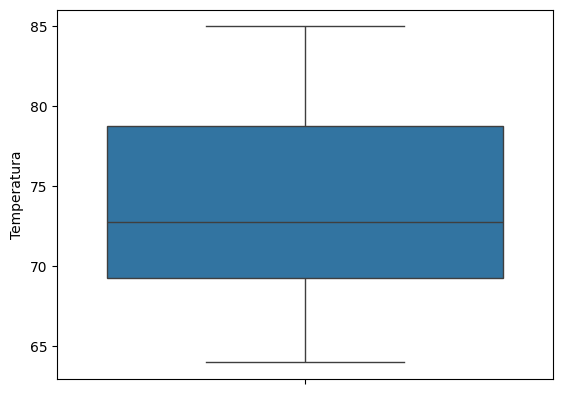

In [30]:
srn.boxplot(data['Temperatura'])

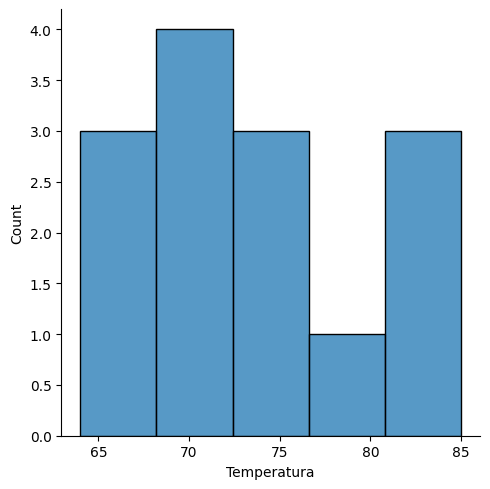

In [31]:
srn.displot(data['Temperatura'])

### Umidade

In [32]:
data['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

In [33]:
mediana_umidade = sts.median(data['Umidade'])
mediana_umidade

85.5

In [34]:
data['Umidade'].fillna(mediana_umidade, inplace=True)
data.isnull().sum()

C:\Users\glauc\AppData\Local\Temp\ipykernel_5572\157807173.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Umidade'].fillna(mediana_umidade, inplace=True)


Aparencia      0
Temperatura    0
Umidade        0
Vento          1
Jogar          0
dtype: int64

In [35]:
data.loc[(data['Umidade'] < 0) | (data['Umidade'] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,200.0,NaN,sim


In [36]:
data.loc[data['Umidade'] > 100, 'Umidade'] = mediana_umidade
data['Umidade'].describe()

count    14.000000
mean     81.285714
std       9.585073
min      65.000000
25%      71.250000
50%      85.250000
75%      89.000000
max      95.000000
Name: Umidade, dtype: float64

<Axes: ylabel='Umidade'>

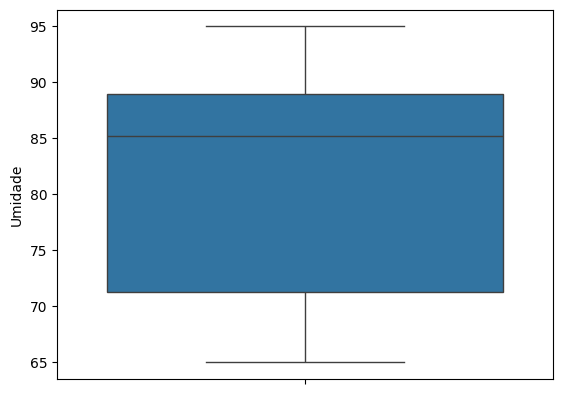

In [37]:
srn.boxplot(data['Umidade'])

### Vento

In [38]:
vento_data = data.groupby(data['Vento']).size()
vento_data

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [39]:
data['Vento'].fillna('FALSO', inplace=True)
data.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          0
Jogar          0
dtype: int64

<Axes: xlabel='Vento', ylabel='Count'>

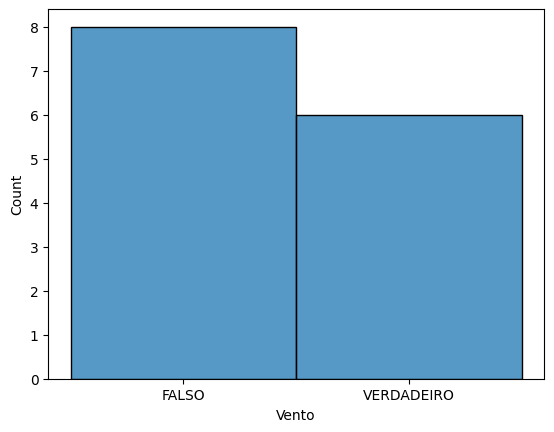

In [40]:
srn.histplot(data['Vento'])

### Jogar

In [41]:
jogar_data = data.groupby(data['Jogar']).size()
jogar_data

Jogar
nao    5
sim    9
dtype: int64